In [40]:
import numpy as np
import sympy as sp
import scipy.sparse as sparse
import matplotlib.pyplot as plt
from matplotlib import cm

import sys
sys.path.append('..')
from Wave2D import Wave2D_Neumann

x, y, t = sp.symbols('x,y,t')

### Question 1 

For the exact solution 
$$
\begin{equation}
u(t,x,y) = e^{\imath (k_x x + k_y y - \omega t)}
\end{equation}
$$
differentiating shows that $\partial_t^2 u = -\omega^2 u$ and that $\Delta u = -(k_x^2 + k_y^2) u$. Thus $u$ solves the wave equation  $\partial_t^2 u = c^2\Delta u$ if and only if $\omega = \pm c\sqrt{k_x^2 + k_y^2} $.

### Question 2

We have the mesh function
$$
\begin{equation}
u^n_{ij} = e^{\imath (kh(i+j) - \tilde{\omega} n\Delta t)}
\end{equation}
$$
 We compute as on page 159 in the FDM book, but must also include a term for the $y$-coordinate. This gives
$$
\frac{4}{\Delta t^2} \sin^2(\tilde{\omega}\Delta t/2)
= c^2 \bigg[ \frac{4}{h^2} \sin^2(kh/2) +
\frac{4}{h^2} \sin^2(kh/2)\bigg].
$$

The $4$'s cancel on both sides and if $C = \frac{c \Delta t}{h} = 1/\sqrt{2}$ we have
\begin{align}
\sin^2(\tilde{\omega}\Delta t/2)
= C^2 \cdot 2\sin^2(kh/2) &= \sin^2(kh/2). \\ 
\implies \sin(\tilde{\omega}\Delta t/2) &= \pm \sin(kh/2) 
\end{align}
Since $\arcsin$ is an odd function, solving for $\tilde{\omega}$ gives 
$$
\tilde{\omega} = \frac{2}{\Delta t} \bigg(\pm \frac{kh}{2}\bigg) = \pm \frac{kh}{\Delta t }.
$$

Finally, we use the information that $C = \frac{c \Delta t}{h} = 1/\sqrt{2}$ to see that $c = \frac{h}{\Delta t \sqrt{2}}$. Using the previous problem we have 
$$
\omega = \pm ck\sqrt{2} = \pm \frac{kh}{\Delta t } = \tilde{\omega}.
$$.

### Make animation

Solving for t in [0, 0.6010407640085654] with (N, Nt) = (30, 51).


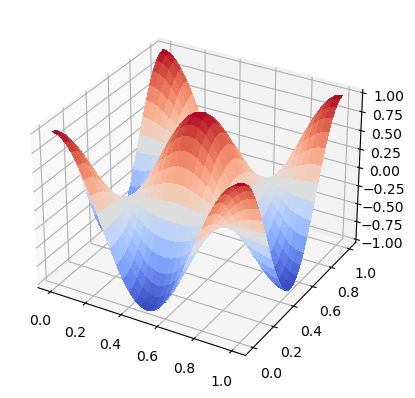

In [45]:
solver = Wave2D_Neumann(cfl=2**(-.5), c=2, mx=2, my=2)
xij, yij, data = solver(N=30, Nt=51, store_data=1)
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xij, yij, data[0], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [46]:
%%capture 
# capture, otherwise there will be a plot in this cell
import matplotlib.animation as animation

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
frames = []
for n, val in data.items():
    frame = ax.plot_wireframe(xij, yij, val, rstride=2, cstride=2);
    #frame = ax.plot_surface(xij, yij, val, vmin=-0.5*data[0].max(), 
    #                        vmax=data[0].max(), cmap=cm.coolwarm,
    #                        linewidth=0, antialiased=False)
    frames.append([frame])
    
ani = animation.ArtistAnimation(fig, frames, interval=400, blit=True,
                                repeat_delay=1000)
ani.save('wavemovie2d.gif', writer='pillow', fps=5) # This animated png opens in a browser

In [47]:
from IPython.display import HTML
from IPython.display import display
display(HTML(ani.to_jshtml()))